In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

## **Loading the Dataset**

In [59]:
df = pd.read_csv('emails.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [61]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [62]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [63]:
df.shape

(5172, 3002)

## **Cleaning**

In [64]:
df.drop(columns=['Email No.'], inplace=True)

In [65]:
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


# Defining functions for :
- split
- train
- test

In [67]:
def spli_and_tarin(n,df):
  X=df.iloc[:, :df.shape[1]-1]
  y=df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

  KNN =  KNeighborsClassifier(n_neighbors=n)
  y_pred=KNN.fit(X_train, y_train).predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  print(f"Accuracy for K-Nearest Neighbors model with {n} neighbors \t: {acc}")
  return acc


# Defining functions for :
- confusion matrix


In [68]:
def plot_cm(n,df):
  X=df.iloc[:, :df.shape[1]-1]
  y=df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

  KNN =  KNeighborsClassifier(n_neighbors=n)
  y_pred=KNN.fit(X_train, y_train).predict(X_test)

  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6, 6))
  sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix for Logistic Regression')
  plt.show()

In [69]:
spli_and_tarin(2,df)

Accuracy for K-Nearest Neighbors model with 2 neighbors 	: 0.8830917874396135


0.8830917874396135

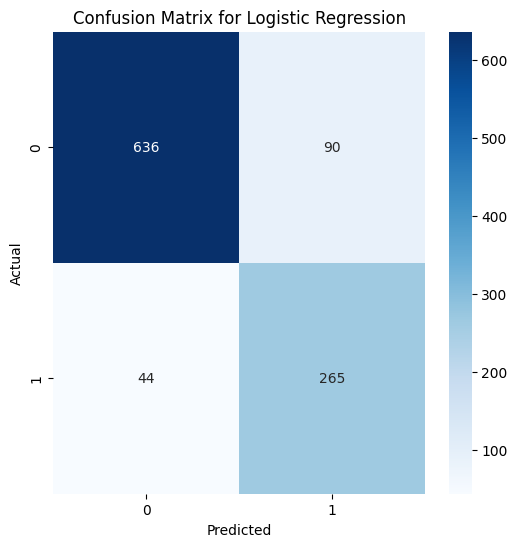

In [70]:
plot_cm(1,df)

# **Handling Imbalanced Classes**

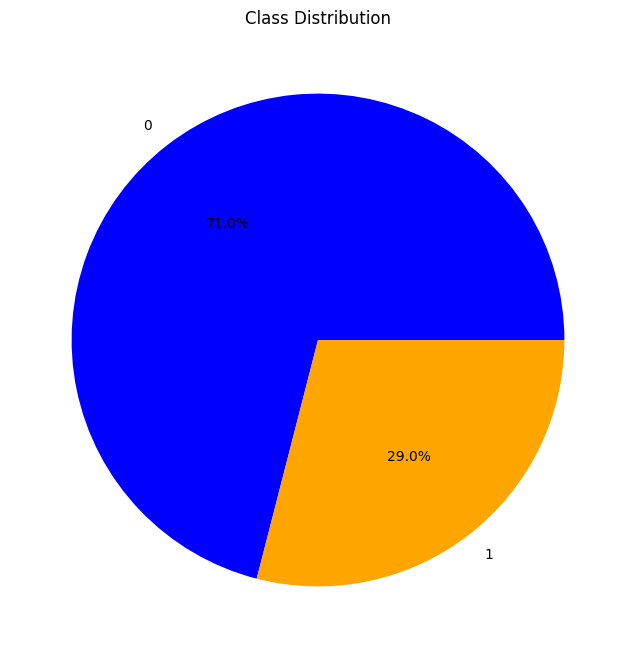

In [71]:
class_counts = df['Prediction'].value_counts()
plt.figure(figsize=(8, 8))
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

In [72]:
data_majority = df[df['Prediction'] == 0]
data_minority = df[df['Prediction'] == 1]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)
df_bal = pd.concat([data_majority, data_minority_upsampled])

In [73]:
df_bal

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,2,3,1,2,3,0,112,3,0,17,...,0,0,0,0,0,0,0,1,0,1
2548,3,2,2,6,2,0,44,2,0,11,...,0,0,0,0,0,0,0,1,0,1
3987,0,0,1,0,0,0,5,2,0,0,...,0,0,0,0,0,0,0,0,0,1
1729,10,7,1,4,0,3,32,4,1,12,...,0,0,0,0,0,0,0,0,0,1


In [74]:
df_bal = df_bal.sample(frac=1, random_state=42).reset_index(drop=True)
df_bal

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,2,3,2,5,2,2,72,0,0,13,...,0,0,0,0,0,0,0,2,0,1
1,61,44,11,24,20,46,378,9,6,117,...,0,0,0,0,0,0,0,8,0,1
2,4,4,12,0,6,2,32,5,4,4,...,0,0,0,0,0,0,0,0,0,0
3,3,11,3,3,4,2,41,2,1,8,...,0,0,0,0,0,0,0,2,0,1
4,0,0,1,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,1,8,1,1,1,0,113,0,0,14,...,0,0,0,0,0,0,0,0,0,1
7340,1,1,1,2,1,1,21,1,0,6,...,0,0,0,0,0,0,0,0,0,1
7341,2,2,1,3,0,0,17,1,0,4,...,0,0,0,0,0,0,0,0,0,1
7342,1,2,2,1,2,0,29,0,0,1,...,0,0,0,0,0,0,0,0,0,0


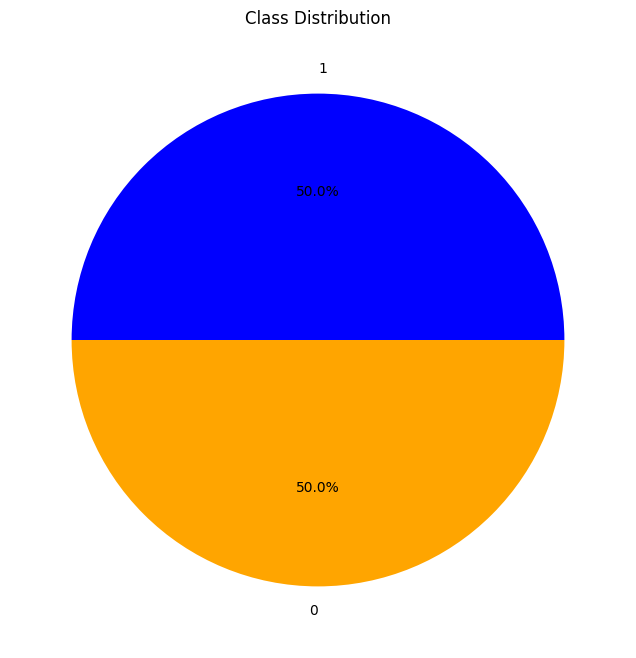

In [75]:
class_counts = df_bal['Prediction'].value_counts()
plt.figure(figsize=(8, 8))
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

In [76]:
spli_and_tarin(2,df_bal)

Accuracy for K-Nearest Neighbors model with 2 neighbors 	: 0.9210347174948945


0.9210347174948945

# **Defining functions for :**
- Elbow curve

In [77]:
k_values = np.arange(1, 21)
accuracy_scores = []

In [78]:
for k in k_values:
    acc = spli_and_tarin(k,df_bal)
    accuracy_scores.append(acc)

Accuracy for K-Nearest Neighbors model with 1 neighbors 	: 0.9332879509870661
Accuracy for K-Nearest Neighbors model with 2 neighbors 	: 0.9210347174948945
Accuracy for K-Nearest Neighbors model with 3 neighbors 	: 0.8917631041524847
Accuracy for K-Nearest Neighbors model with 4 neighbors 	: 0.8938053097345132
Accuracy for K-Nearest Neighbors model with 5 neighbors 	: 0.8706603131381893
Accuracy for K-Nearest Neighbors model with 6 neighbors 	: 0.8808713410483322
Accuracy for K-Nearest Neighbors model with 7 neighbors 	: 0.8624914908100749
Accuracy for K-Nearest Neighbors model with 8 neighbors 	: 0.8679373723621511
Accuracy for K-Nearest Neighbors model with 9 neighbors 	: 0.853641933287951
Accuracy for K-Nearest Neighbors model with 10 neighbors 	: 0.8584070796460177
Accuracy for K-Nearest Neighbors model with 11 neighbors 	: 0.8481960517358748
Accuracy for K-Nearest Neighbors model with 12 neighbors 	: 0.8563648740639891
Accuracy for K-Nearest Neighbors model with 13 neighbors 	: 0.

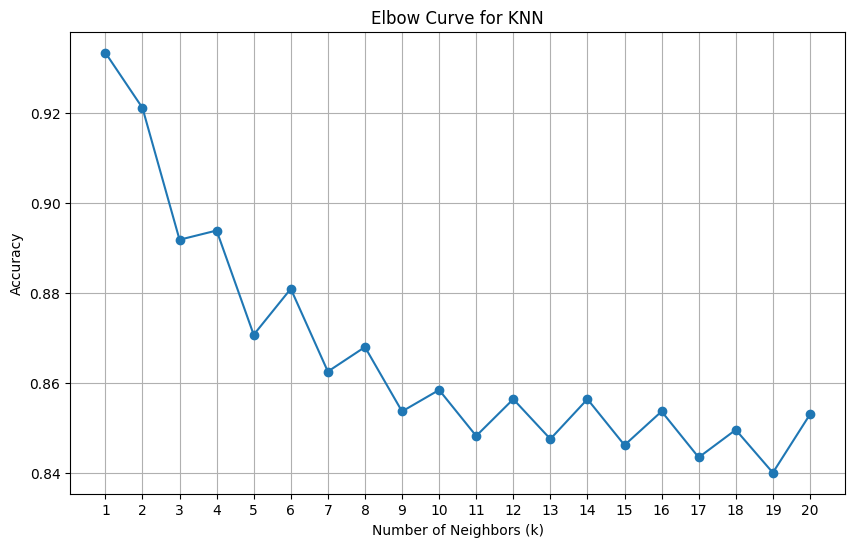

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

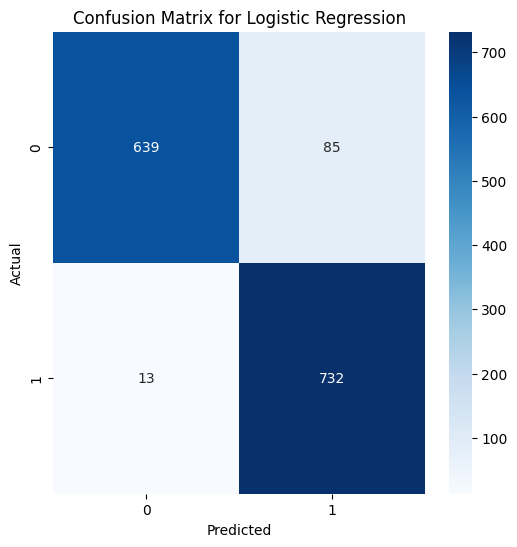

In [80]:
plot_cm(1,df_bal)